In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weather_classification_data.csv')
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


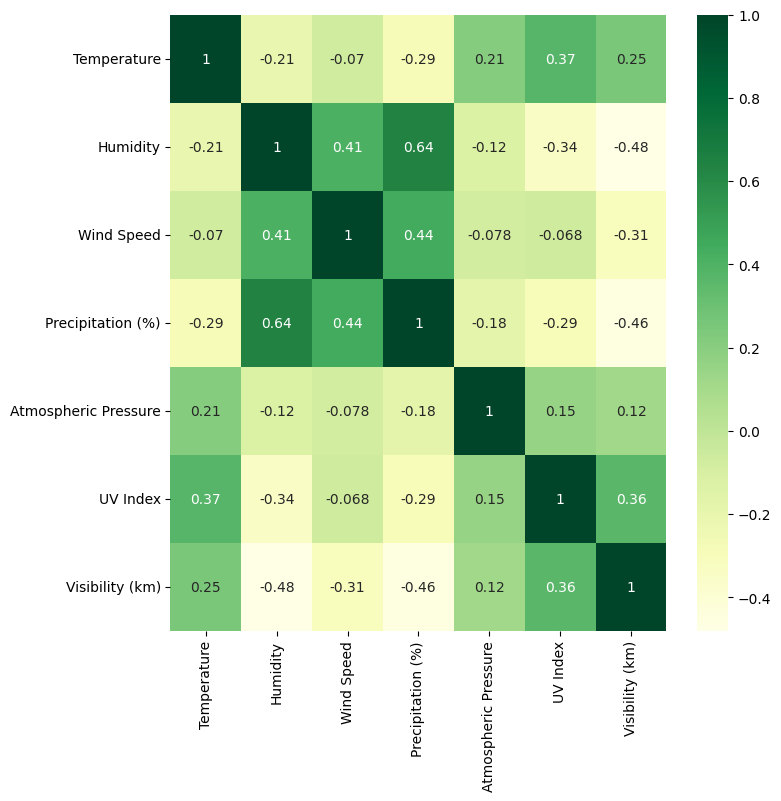

In [3]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True),cmap='YlGn',annot=True)
plt.show()

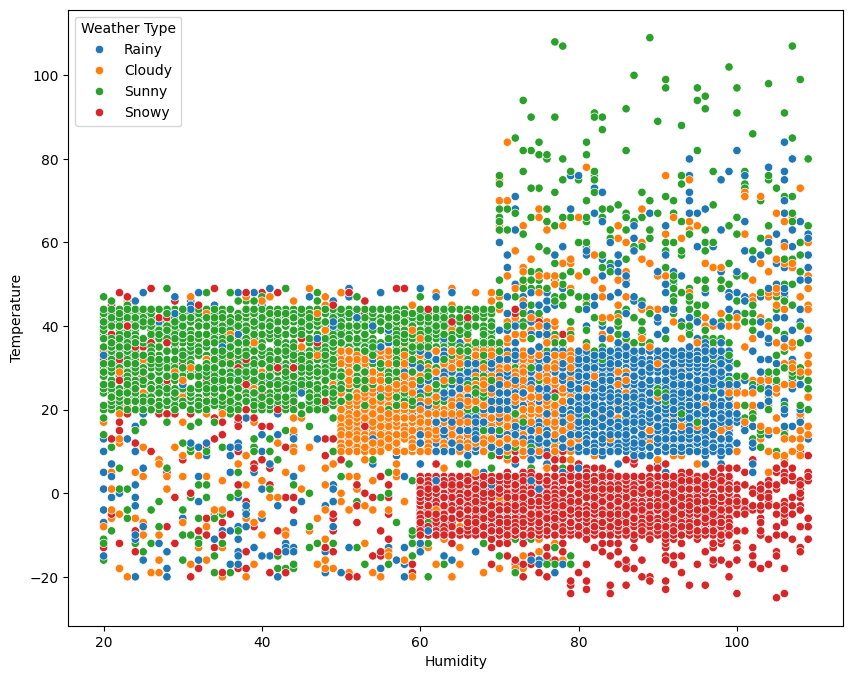

In [4]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Humidity',y='Temperature',hue='Weather Type',data=df)
plt.show()

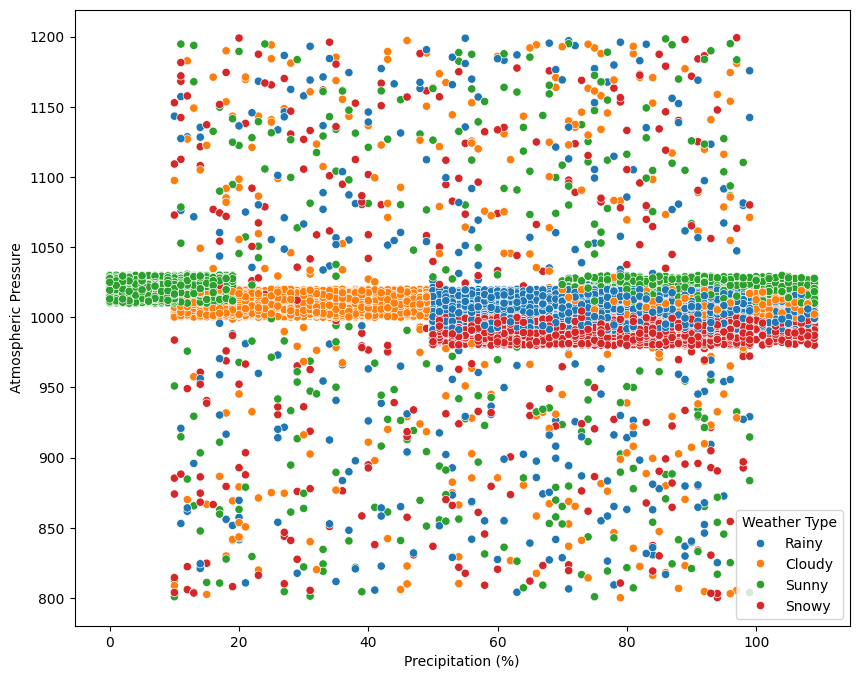

In [5]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Precipitation (%)',y='Atmospheric Pressure',hue='Weather Type',data=df)
plt.show()

In [6]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [7]:
df['Cloud Cover'].value_counts()

overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: Cloud Cover, dtype: int64

In [8]:
df['Season'].value_counts()

Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: Season, dtype: int64

In [9]:
df['Location'].value_counts()

inland      4816
mountain    4813
coastal     3571
Name: Location, dtype: int64

In [10]:
df['Weather Type'].value_counts()

Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: Weather Type, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Cloud Cover','Season','Location']:
    df[col] = le.fit_transform(df[col])
df    

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,Rainy
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,Cloudy
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,Sunny
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,Sunny
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1003.15,1,2,1.0,2,Rainy
13196,-1.0,76,3.5,23.0,1,1067.23,1,3,6.0,0,Snowy
13197,30.0,77,5.5,28.0,2,1012.69,3,0,9.0,0,Cloudy
13198,3.0,76,10.0,94.0,2,984.27,0,3,2.0,1,Snowy


In [12]:
X = df.drop('Weather Type',axis=1)
y = df['Weather Type']

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [14]:
X

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,-0.294931,0.212404,-0.048086,0.887629,0.997539,0.134203,-0.520104,0.987831,-0.582231,-0.118893
1,1.143035,1.351385,-0.192836,0.543291,0.997539,0.150602,0.776424,-0.729231,1.345768,-0.118893
2,0.625367,-0.233285,-0.409962,-1.178401,-1.966116,0.346579,0.257813,-0.729231,0.010999,1.144706
3,1.085516,0.707613,-1.206089,0.887629,-1.966116,0.549008,0.776424,-0.729231,-1.323769,-1.382492
4,0.452811,0.261924,1.037543,0.386773,0.009654,-0.407490,-0.779410,0.987831,-0.878846,1.144706
...,...,...,...,...,...,...,...,...,...,...
13195,-0.525006,0.261924,0.675666,0.543291,0.009654,-0.071990,-0.779410,0.129300,-1.323769,1.144706
13196,-1.157711,0.360966,-0.916588,-0.959276,-0.978231,1.650675,-0.779410,0.987831,0.159307,-1.382492
13197,0.625367,0.410487,-0.627087,-0.802759,0.009654,0.184474,-0.260799,-1.587763,1.049153,-1.382492
13198,-0.927636,0.360966,0.024290,1.263271,0.009654,-0.579542,-1.038715,0.987831,-1.027154,-0.118893


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [17]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Ada Boost Classifier": AdaBoostClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "Neural Network": MLPClassifier()
}

In [18]:
for name,model in models.items():
    model.fit(X_train,y_train)
    print('{} : {:.2f}'.format(name,model.score(X_test,y_test)*100))

Logistic Regression : 84.97
Decision Tree Classifier : 89.80
Gradient Boosting Classifier : 90.71
Ada Boost Classifier : 87.15
Random Forest Classifier : 91.26
Support Vector Classifier : 90.25
Neural Network : 90.03


c:\Users\Pranav\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
print('Random Forest Classifier : {:.2f}'.format(rf_model.score(X_test,y_test)*100))

Random Forest Classifier : 91.19


In [22]:
import pickle
with open('randomforest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  int32  
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  int32  
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  int32  
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int32(3), int64(2), object(1)
memory usage: 979.8+ KB


In [26]:
y

0         Rainy
1        Cloudy
2         Sunny
3         Sunny
4         Rainy
          ...  
13195     Rainy
13196     Snowy
13197    Cloudy
13198     Snowy
13199     Rainy
Name: Weather Type, Length: 13200, dtype: object

In [28]:
df['Cloud Cover'].unique()

array([3, 0, 2, 1])